In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
%load_ext autoreload
%autoreload 2


# Import modules created for this project
import project_modules.calibrate_camera as cc
import project_modules.image_process as ip
import project_modules.find_lanes as fl

In [2]:
# Misc functions

def plot_curvature(leftx, rightx, left_fitx, right_fitx, ploty):
    mark_size = 3
    plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
    plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
    plt.xlim(0, 1280)
    plt.ylim(0, 720)
    plt.plot(left_fitx, ploty, color='green', linewidth=3)
    plt.plot(right_fitx, ploty, color='green', linewidth=3)
    plt.gca().invert_yaxis() # to visualize as we do the images
    

In [3]:
# Image procss pipeline
def image_process_pipeline(img, imgpoints, objpoints):
    img = ip.undistort_image(img, imgpoints, objpoints)
    img = ip.color_gradient_threshold(img)
    img, Minv = ip.perspective_transform(img)    
    return img, Minv

In [4]:
image_names = cc.get_calibration_image_names()
imgpoints, objpoints = cc.calibrate_camera(image_names)

574.595531697 m 575.388564914 m


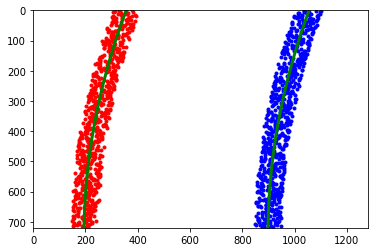

In [5]:
img = cv2.imread('./test_images/test6.jpg')
processed_img, Minv = image_process_pipeline(img, imgpoints, objpoints)
out_img, left_fit, right_fit, left_lane_inds, right_lane_inds = fl.find_lanes(processed_img)
left_curverad, right_curverad, leftx, rightx, left_fitx, right_fitx, ploty = fl.curvature_measurement(out_img, left_fit, right_fit)
plot_curvature(leftx, rightx, left_fitx, right_fitx, ploty)
print(left_curverad, 'm', right_curverad, 'm')

582.604084477 m 502.523599142 m


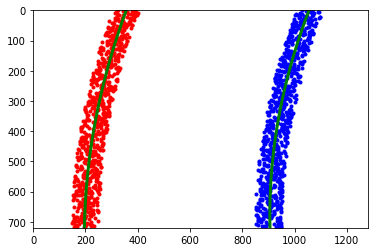

In [6]:
img = cv2.imread('./test_images/test1.jpg')
processed_img, Minv = image_process_pipeline(img, imgpoints, objpoints)
out_img, left_fit, right_fit, left_lane_inds, right_lane_inds = fl.find_lanes(processed_img)
left_curverad, right_curverad, leftx, rightx, left_fitx, right_fitx, ploty = fl.curvature_measurement(out_img, left_fit, right_fit)
plot_curvature(leftx, rightx, left_fitx, right_fitx, ploty)
print(left_curverad, 'm', right_curverad, 'm')